# 基于决策数进行的分类任务
通过属性值区分wine葡萄酒属于什么类型

In [1]:
import pandas as pd
from sklearn import tree
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
import graphviz
# brew install graphviz <= https://stackoverflow.com/questions/35064304/runtimeerror-make-sure-the-graphviz-executables-are-on-your-systems-path-aft

# graphviz的曲折安装
pip 之后发现IDE化了波浪线，这是因为pip没有安装依赖的原因，需要使用conda install安装（conda install python-graphviz）
教程： https://zhuanlan.zhihu.com/p/417012153
brew install graphviz <= https://stackoverflow.com/questions/35064304/runtimeerror-make-sure-the-graphviz-executables-are-on-your-systems-path-aft

In [2]:
# 1 数据获取
wine = load_wine()

In [3]:
# 2 数据处理
# 2.1观察数据属性
wine.feature_names      #也可以查看其他的属性 wine,wine.target,wine.data

['alcohol',
 'malic_acid',
 'ash',
 'alcalinity_of_ash',
 'magnesium',
 'total_phenols',
 'flavanoids',
 'nonflavanoid_phenols',
 'proanthocyanins',
 'color_intensity',
 'hue',
 'od280/od315_of_diluted_wines',
 'proline']

In [4]:
# 2.2数据可视化
wineframe = pd.DataFrame(data=wine.data,columns=wine.feature_names)
wineframe['tag'] = wine.target  #增添一行属性值
wineframe

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,tag
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0,2
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0,2
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0,2
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0,2


In [5]:
# 查看表格属性值
wineframe.describe

<bound method NDFrame.describe of      alcohol  malic_acid   ash  alcalinity_of_ash  magnesium  total_phenols  \
0      14.23        1.71  2.43               15.6      127.0           2.80   
1      13.20        1.78  2.14               11.2      100.0           2.65   
2      13.16        2.36  2.67               18.6      101.0           2.80   
3      14.37        1.95  2.50               16.8      113.0           3.85   
4      13.24        2.59  2.87               21.0      118.0           2.80   
..       ...         ...   ...                ...        ...            ...   
173    13.71        5.65  2.45               20.5       95.0           1.68   
174    13.40        3.91  2.48               23.0      102.0           1.80   
175    13.27        4.28  2.26               20.0      120.0           1.59   
176    13.17        2.59  2.37               20.0      120.0           1.65   
177    14.13        4.10  2.74               24.5       96.0           2.05   

     flavanoids  

In [6]:
# 2.3 数据集划分（训练集and测试集）
x_train,x_test,y_train,y_test = train_test_split(wine.data,wine.target,test_size=0.3)
x_train.shape   # 观察数据集划分结果

(124, 13)

In [7]:
# 机器学习算法
# 采用sklearn中的tree，利用决策树分类
clf = tree.DecisionTreeClassifier(criterion='entropy')  # gini指数｜ID3熵
clf.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy')

In [8]:
# 查看预测值
y_pre = clf.predict(x_test)
print(y_pre)

[1 0 0 0 0 0 2 2 2 1 0 0 0 0 1 2 1 2 2 0 2 2 0 0 0 2 0 1 0 1 1 1 2 1 0 0 2
 0 1 1 1 1 0 2 2 0 2 0 2 0 1 2 1 2]


In [9]:
clf.apply(x_test)   # 返回每个测试样本所在叶节点索引

array([ 8, 18, 18, 18, 18, 18,  2,  6,  2,  8, 18, 18, 18, 18,  8,  6,  8,
        2,  2, 18,  2,  2, 18, 18, 11, 14, 18,  8, 18,  8,  8,  8,  2,  8,
       18, 18, 14, 11,  8,  8,  8,  8, 18,  2,  2, 18,  6, 18,  6, 18,  8,
       14,  8,  2])

In [10]:
result = clf.score(x_test,y_test)
print(result)

0.9259259259259259


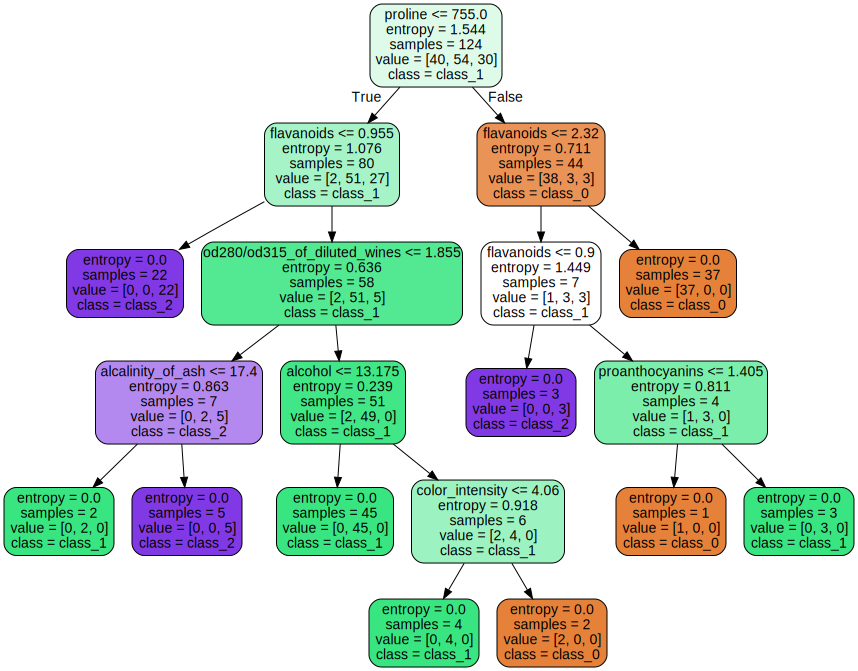

In [11]:
# 生成决策树，了解每个参数的作用
# 通过修改上面clf的参数值，修改最终决策树的生成
dot_data = tree.export_graphviz(clf
                                ,feature_names=wine.feature_names
                                ,class_names=wine.target_names
                                ,filled=True
                                ,rounded=True)
graph = graphviz.Source(dot_data)
graph

In [12]:
clf.feature_importances_    #查看每个属性的重要性

array([0.03479942, 0.        , 0.        , 0.03155462, 0.        ,
       0.        , 0.40349322, 0.        , 0.01694818, 0.02877579,
       0.        , 0.09737588, 0.38705288])

In [13]:
[*zip(wine.feature_names,clf.feature_importances_)]     #将上面的importance与其属性值放置一起

[('alcohol', 0.03479942258026868),
 ('malic_acid', 0.0),
 ('ash', 0.0),
 ('alcalinity_of_ash', 0.031554617979336376),
 ('magnesium', 0.0),
 ('total_phenols', 0.0),
 ('flavanoids', 0.40349321938771227),
 ('nonflavanoid_phenols', 0.0),
 ('proanthocyanins', 0.016948184280947114),
 ('color_intensity', 0.02877579195856681),
 ('hue', 0.0),
 ('od280/od315_of_diluted_wines', 0.09737588098277462),
 ('proline', 0.3870528828303942)]

0.9444444444444444


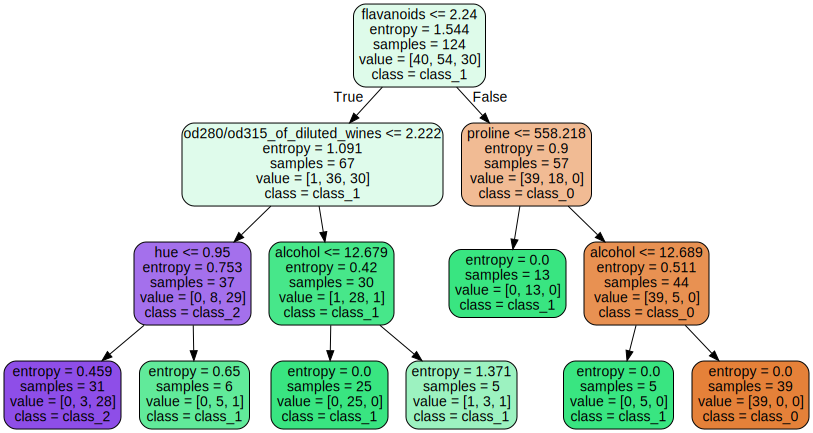

In [18]:
# 决策树的参数探索，final，整合了上面所有的代码
clf = tree.DecisionTreeClassifier(criterion='entropy'
                                ,splitter='random'
                                ,random_state=30
                                ,max_depth=3
                                ,min_samples_leaf=4
                                ,min_samples_split=10
                                )
clf.fit(x_train,y_train)
result = clf.score(x_test,y_test)
print(result)
dot_data = tree.export_graphviz(clf
                                ,feature_names=wine.feature_names
                                ,class_names=wine.target_names
                                ,filled=True
                                ,rounded=True)
graph = graphviz.Source(dot_data)
graph